# 分类模型建模调参

## 【任务背景】    
   - **逻辑回归logistic regression：**                      
   说到分类问题与回归问题的区别，在于回归问题与分类问题需要预测的因变量不一样。在回归问题中，因变量是连续性变量，我们需要预测$E(Y|X)$是一个连续的实数，但是在分类问题中，我们往往是通过已知X的信息预测Y的类别，往往是一个离散集合中的某个元素。如：是否患癌症，图片是猫还是狗等。一个很自然的想法是能否用线性回归去处理分类问题，答案是可以但不好！先来看看线性回归处理分类问题会出现什么弊端，我们仔细来看这个线性回归的例子，${default = \beta_0 + \beta_1 Balance + \beta_2 Income}$，只要输入Balance 和 Income 以及default的数据就能用最小二乘法估计出${\beta_0,\beta_1}$,设定预测的default>0.5就是违约反之不违约，感觉很完美的样子，但事实真的是这样吗？假设我们需要用某个人的债务(Balance)和收入(Income)去预测是否会信用卡违约(default)：       
      - 我们假设有一个穷人Lisa,他的Balance和Income都很小，那么有可能会导致default的值为负数，那么这个负数代表什么意义呢？显然是没有任何意义的。                
      ![jupyter](./1.23.png)                            
      - 当我们的分类变量是多类的时候，以0.5为界限划分分类就不可用了，那么我们应该怎么找到一个界限衡量多分类呢？                              
   基于以上问题，现在大家是否还觉得线性回归模型作为一个分类模型是否足够优秀呢？其实，为了解决以上的问题（1）我们来想想能不能将线性回归的结果default转化为区间[0:1]上，让default转变成一个违约的概率呢？下面我们来解决这个问题吧。                              
   在推导逻辑回归之前，我们先来认识下一组函数，这组函数具有神奇的作用，可以将是实数轴上的数转换为[0:1]区间上的概率。
  首先，我们假设我们的线性回归模型为 ${Y=\beta_0+\beta_1 X}$，那么这个函数是如何将线性回归的结果转化为概率呢？这个函数就是logistic 函数，具体的形式为   ${p(X) = \dfrac{e^{\beta_0 + \beta_1X}}{1+e^{\beta_0 + \beta_1X}}}$，他的函数图像如下图：（左边是线性回归，右边是逻辑函数）                             
  ![jupyter](./1.24.png)                                   
  因此，我们假设逻辑回归模型为：$p(y = 1|x) = \frac{1}{1+e^{-w^Tx}}$ .                              
  下面我们来具体推导下逻辑回归模型：                          
  假设数据Data$\{(x_i,y_i) \},\;\;i = 1,2,...,N,\;\;x_i \in R^p,y_i \in \{0,1 \}$，设$p_1 = p(y=1|x) = \sigma(w^T) = \frac{1}{1+e^{-w^Tx}}$。因为y只可能取0或者1，因此假设数据服从0-1分布，也叫伯努力分布，即：当y=1时，$p(y|x)=p_1$，当y=0时，$p(y|x)=1-p_1$，可以写成$p(y|x) = p_1^y(1-p_1)^{1-y}$，可以带入y=0和y=1进去验证，结果和前面的结论一模一样。                    
  我们使用极大似然估计MLE，即：                         
  $$
  \hat{w} = argmax_w\;\;log\;P(Y|X) = argmax_x\;\;log\;\prod_{i=1}^N P(y_i|x_i) = argmax_w \sum\limits_{i=1}^{N} log\;P(y_i|x_i)\\
  \;\;\; = argmax_w \sum\limits_{i=1}^{N}(y_ilog\;p_1 + (1-y_i)log(1-p_1)) \\ 
  记：L(w) = \sum\limits_{i=1}^{N}(y_ilog\;p_1 + (1-y_i)log(1-p_1))\\
 \;\;\; \frac{\partial L}{\partial w_k} = \sum\limits_{i=1}^{N} y_i\frac{1}{p_1}\frac{\partial p_1}{\partial z}\frac{\partial z}{\partial w_k} + (1-y_i)\frac{1}{1-p_1}(-\frac{\partial p_1}{\partial z}\frac{\partial z}{\partial w_k})\\
  \;\;\;=\sum\limits_{i=1}^{N}y_i\frac{1}{\sigma(z)}(\sigma(z_i)-\sigma(z_i)^2)x_i + (1-y_i)\frac{1}{1-\sigma(z_i)}[-(\sigma(z_i)-\sigma(z_i)^2)x_i]\\
  \;\;\; =\sum\limits_{i=1}^{N}[(y_i-y_i\sigma(z_i))x_i + (1-y_i)(-\sigma(z_i))x_i]\\
  \;\;\; = \sum\limits_{i=1}^{N}y_ix_i-\sigma(z_i)x_i = \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i
  $$                 
  因此，$\frac{\partial L}{\partial w_k} = \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i$，由于这里涉及的函数不像线性回归一样能简单求出解析解，因此我们使用迭代的优化算法：梯度下降法，即：                       
  $w_k^{(t+1)}\leftarrow w_k^{(t)} - \eta \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i^{(k)},\;\;\;其中，x_i^{(k)}为第i个样本第k个特征$                                 
 值得注意的是，逻辑回归在实际中不太用于多分类问题，因为实际效果不是很好，所以我们可以借助其他模型来解决这个问题。

   - 基于概率的分类模型：                               
   (1) 线性判别分析：                                              
   线性判别分析是一个比较久远的算法，我将会从两个方向去描述这个算法，因为我觉得每位读者都有自己喜欢的那个理解的方向，分别是基于贝叶斯公式和降维分类的思想。                        
      - 基于贝叶斯公式对线性判别分析的理解：                       
   在讨论如何解决多分类问题之前，我们先来说说贝叶斯的那些事吧。在概率统计的领域里有一条神奇的公式叫贝叶斯定理，具体的形式是：${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$ ，我们 先不要被公式的符号吓到，我们先来看看符号具体代表什么意思。我们假设观测有${K}$类，${\pi_k}$为随机选择的观测来自第${k}$类的 __先验概率__，也就是样本里面第${k}$类的样本个数除以总样本的个数：${\pi_k = \dfrac{n_k}{n}}$。再来 ${f_k(x) =P(X=x|Y=k)}$，表示第${k}$类观测的X的密度函数，说的直白一点就是在${Y=k}$的样本里${X=x}$的样本个数，即${f_k(x) = P(X=x|Y=k) = \dfrac{n_{(X=x,Y=k)}}{n_{(Y=k)}}}$，最后，${\sum\limits_{l=1}^K{\pi}_lf_l(x)}=P(X=x)=\dfrac{n_{(X=x)}}{n}$，也就是样本中${X=x}$的概率。
      在讨论贝叶斯定理后，我们回到分类问题，这个定理跟我们的分类问题有什么关联呢？没错，这个公式${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$给出了给定样本条件下，${Y=k}$这个类别下的概率，这给分类问题提供了一条思路，那就是计算这个${P(Y=k|X=x)}$，而且我们的逻辑回归就是这么干的，但是在${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$这个公式中，分母${{\sum\limits_{l=1}^K{\pi}_lf_l(x)} = P(X=x)}$当样本给定的时候是一个与分类${k}$无关的常数,所以我们的问题可以简化为只需要计算分子${{\pi}_kf_k(x)}$,进而比较哪个类别的概率最大就知道属于哪个类别了，因此我们的分类思路就出来啦，这个思路不同于逻辑回归，逻辑回归需要计算具体的${P(Y=k|X=x)}$概率值，而我们现在的思路是通过贝叶斯定理计算贝叶斯定理的分子，比较分子最大的那个类别为最终类别。                 
      在我们推导复杂算法之前，我们先推导下简单的当自变量个数只有一个的模型，即${p=1}$的简单模型。我们记${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$ 的分子为${g_k(x) = {\pi}_kf_k(x)}$。在这里，我们做个模型假设：假设${f_k(x) }$服从正态分布，即${f_k(x) \sim N(\mu,\sigma_k^2)}$，而且每个${\sigma_k^2 = \sigma^2}$，同方差假设。因此${f_k(x) = \dfrac{1}{\sqrt{2\pi}\sigma_k}e^{-\dfrac{1}{2\sigma^2}(x-\mu_k)^2}}$，最终我们的${g_k(x) = \pi_k\dfrac{1}{\sqrt{2\pi}\sigma_k}e^{-\dfrac{1}{2\sigma^2}(x-\mu_k)^2}}$,终于算出来啦。这个式子不是很好计算，我们对${g_k(x)}$取个对数，令${\delta_k(x) = ln(g_k(x))=ln\pi_k+\dfrac{\mu}{\sigma^2}x-\dfrac{\mu^2}{2\sigma^2}}$，到这里我们的模型建立模型，我们只需要把位置的${\mu_k}$与${\sigma^2}$估计出来就好了。${\hat{\mu}_k =\dfrac{1}{n_k}\sum\limits_{i:y_i=k}x_i}$，也就是当${y=k}$这一类中${x}$的平均值；${\hat{\sigma}^2 =\dfrac{1}{n-K}\sum\limits_{k=1}^K\sum\limits_{i:y_i=k}(x_i-\hat{\mu}_k)^2 }$，说白了就是计算每一类的方差，再求平均值。总结下上面的公式就是：                                    
${\begin{cases}\delta_k(x) = ln(g_k(x))=ln\pi_k+\dfrac{\mu}{\sigma^2}x-\dfrac{\mu^2}{2\sigma^2}\\{\hat{\mu}_k =\dfrac{1}{n_k}\sum\limits_{i:y_i=k}x_i}\\{\hat{\sigma}^2 =\dfrac{1}{n-K}\sum\limits_{k=1}^K\sum\limits_{i:y_i=k}(x_i-\hat{\mu}_k)^2}\end{cases}}$                              
      至此，我们的模型就建立完成了，我们只需要代入数据求出${\delta_k(x)}$，哪个${k}$对应的${\delta_k(x)}$大，就是哪一类。                                   
   （下图虚线是线性判别分析的决策边界，正态曲线哪边高样本就是哪一类）                  
      ![jupyter](./1.25.png)                            
      我们推到出了一个自变量的简单模型，就要泛化为多个自变量的线性判别分析了，即${p>1}$。其实原理一样的，只是将一元正态分布扩展为多元正态分布：
      ${f_k(x)=\dfrac{1}{(2\pi)^{\tfrac{p}{2}}|\Sigma|^\tfrac{1}{2}}e^{[-\tfrac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)]}}$                           
      ${\hat{\mu_k}=(\mu_{k1},\mu_{k2},......,\mu_{kp})   ,   \hat{\Sigma}=\dfrac{1}{p-1}\sum\limits_{j=1}^p(x_j-\overline{x})(x_j-\overline{x})^T}$                               
      ${\delta_k(x) = ln(\pi_kf_k(x))=ln(\pi_k)-(\dfrac{p}{2}ln(2\pi)+\dfrac{1}{2}ln(|\Sigma|))-\dfrac{1}{2}(x-\mu_k)^T\Sigma^-1(x-\mu_k)=x^T\hat{\Sigma}\hat{\mu}_k-\dfrac{1}                                                       {2}\hat{\mu}_k^T\hat{\Sigma}^{-1}\hat{\mu}_k+ln\hat{\pi}_k}$                            
      - 降维分类的思想理解线性判别分析：                   
      基于数据进行分类时，一个很自然的想法是：将高维的数据降维至一维，然后使用某个阈值将各个类别分开。下面用图的形式展示：                   
      ![jupyter](./1.26.png)                        
      图中，数据的维度是二维的，我们的想法是把数据降维至一维，然后用阈值就能分类。这个似乎是一个很好的想法，我们总是希望降维后的数据同一个类别自身内部方差小，不同类别之间的方差要尽可能大。这也是合理的，因为同一个类别的数据应该更加相似，因此方差小；不同类别的数据之间应该很不相似，这样才能更容易对数据进行分类，我们简称为：**类内方差小，类间方差大**，在计算机语言叫“松耦合，高内聚”。在做具体的推导之前，我们对数据的形式和一些基本统计量做一些描述：                            
      特征$X = (x_1,x_2,...,x_N)^T$，因变量$Y = (y_1,y_2,...,y_N)^T,\;\;其中，y_i \in \{+1,-1 \}$，类别c1的特征$X_{c_1} = \{x_i|y_i=+1 \}$，同理，类别c2的特征$X_{c_2} = \{x_i|y_i=-1 \}$，属于c1类别的数据个数为$N_1$，属于类别c2的数据个数为$N_2$，其中，$N_1+N_2 = N$。                         
      特征X投影在w方向至一维：$z_i = w^Tx_i,\;\;||w|| = 1$                            
      全样本投影的均值$\bar{z} = \frac{1}{N}\sum\limits_{i=1}^{N}z_i = \frac{1}{N}\sum\limits_{i=1}^{N}w^Tx_i$                    
      全样本投影的协方差$S_z = \frac{1}{N}\sum\limits_{i=1}^{N}(z_i-\bar{z})(z_i-\bar{z})^T = \frac{1}{N}\sum\limits_{i=1}^{N}(w^Tx_i-\bar{z})(w^Tx_i-\bar{z})^T$                   
      c1样本投影的均值$\bar{z_1} = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}z_i = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}w^Tx_i$                    
      c1样本投影的协方差$S_{z_1} = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}(z_i-\bar{z_1})(z_i-\bar{z_1})^T = \frac{1}{N_1}\sum\limits_{i=1}^{N_1}(w^Tx_i-\bar{z_1})(w^Tx_i-\bar{z_1})^T$                       
      c2样本投影的均值 $\bar{z_2} = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}z_i = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}w^Tx_i$                     
      c2样本投影的协方差$S_{z_2} = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}(z_i-\bar{z_2})(z_i-\bar{z_2})^T = \frac{1}{N_2}\sum\limits_{i=1}^{N_2}(w^Tx_i-\bar{z_2})(w^Tx_i-\bar{z_2})^T$                      
      类间差距：$(\bar{z}_1-\bar{z}_2)^2$                      
      类内方差：$S_1 + S_2$                          
      由于线性判别分析的目标是同一类别内方差小，不同类别之间距离大，因此损失函数定义为：   
                            
   $$
      J(w) = \frac{(\bar{z}_1-\bar{z}_2)^2}{s_1+s_2} = \frac{w^T(\bar{x}_{c_1}-\bar{x}_{c_2})(\bar{x}_{c_1}-\bar{x}_{c_2})^Tw}{w^T(s_{c_1}+s_{c_2})w}\\
      \;\;\; \hat{w} = argmax_w\;J(w)
   $$                             
   记：$S_b = (\bar{x}_{c_1}-\bar{x}_{c_2})(\bar{x}_{c_1}-\bar{x}_{c_2})^T,\;S_w = (s_{c_1}+s_{c_2})$，因此$J(w) = \frac{w^TS_bw}{w^TS_ww}$                   
   让J(w)对w求导等于0，求出：$w = S_w^{-1}(\bar{x}_{c_1}-\bar{x}_{c_2})$                       
   (2) 朴素贝叶斯：                                        
   在线性判别分析中，我们假设每种分类类别下的特征遵循同一个协方差矩阵，每两个特征之间是存在协方差的，因此在线性判别分析中各种特征是不是独立的。但是，朴素贝叶斯算法对线性判别分析作进一步的模型简化，它将线性判别分析中的协方差矩阵中的协方差全部变成0，只保留各自特征的方差，也就是朴素贝叶斯假设各个特征之间是不相关的。在之前所看到的偏差-方差理论中，我们知道模型的简化可以带来方差的减少但是增加偏差，因此朴素贝叶斯也不例外，它比线性判别分析模型的方差小，偏差大。虽然简化了模型，实际中使用朴素贝叶斯的案例非常多，甚至多于线性判别分析，例如鼎鼎大名的新闻分类，垃圾邮件分类等。

   - 决策树 ：                     
   与前面内容所讲的决策树回归大致是一样的，只是在回归问题中，选择分割点的标准是均方误差，但是在分类问题中，由于因变量是类别变量而不是连续变量，因此用均方误差显然不合适。那问题是用什么作为选择分割点的标准呢？我们先来分析具体的问题：                         
   在回归树中，对一个给定的观测值，因变量的预测值取它所属的终端结点内训练集的平均因变量。与之相对应，对于分类树来说，给定一个观测值，因变量的预测值为它所属的终端结点内训练集的**最常出现的类**。分类树的构造过程与回归树也很类似，与回归树一样，分类树也是采用递归二叉分裂。但是在分类树中，均方误差无法作为确定分裂节点的准则，一个很自然的替代指标是分类错误率。分类错误率就是：此区域内的训练集中非常见类所占的类别，即：                                   
   $$
   E = 1-max_k(\hat{p}_{mk})
   $$                       
   上式中的$\hat{p}_{mk}$代表第m个区域的训练集中第k类所占的比例。但是在大量的事实证明：分类错误率在构建决策树时不够敏感，一般在实际中用如下两个指标代替：             
   (1) 基尼系数：                   
   $$
   G = \sum\limits_{k=1}^{K} \hat{p}_{mk}(1-\hat{p}_{mk})
   $$             
   在基尼系数的定义中，我们发现这个指标衡量的是K个类别的总方差。不难发现，如果所有的$\hat{p}_{mk}$的取值都接近0或者1，基尼系数会很小。因此基尼系数被视为衡量结点纯度的指标----如果他的取值小，那就意味着某个节点包含的观测值几乎来自同一个类别。                         
   由基尼系数作为指标得到的分类树叫做：CART。                        
   (2) 交叉熵：                       
   可以替代基尼系数的指标是交叉熵，定义如下：                           
   $$
   D = -\sum\limits_{k=1}^{K} \hat{p}_{mk}log\;\hat{p}_{mk}
   $$                     
   显然，如果所有的$\hat{p}_{mk}$都接近于0或者1，那么交叉熵就会接近0。因此，和基尼系数一样，如果第m个结点的纯度越高，则交叉熵越小。事实证明，基尼系数和交叉熵在数值上时很接近的。                   
   
   ![jupyter](./1.27.png)                                            
   决策树分类算法的完整步骤：                          
      a.  选择最优切分特征j以及该特征上的最优点s：                
      遍历特征j以及固定j后遍历切分点s，选择使得基尼系数或者交叉熵最小的(j,s)                                                   
       b. 按照(j,s)分裂特征空间，每个区域内的类别为该区域内样本比例最多的类别。                           
       c. 继续调用步骤1，2直到满足停止条件，就是每个区域的样本数小于等于5。        
       d. 将特征空间划分为J个不同的区域，生成分类树。   

选择度量模型性能的指标：                                    
度量分类模型的指标和回归的指标有很大的差异，首先是因为分类问题本身的因变量是离散变量，因此像定义回归的指标那样，单单衡量预测值和因变量的相似度可能行不通。其次，在分类任务中，我们对于每个类别犯错的代价不尽相同，例如：我们将癌症患者错误预测为无癌症和无癌症患者错误预测为癌症患者，在医院和个人的代价都是不同的，前者会使得患者无法得到及时的救治而耽搁了最佳治疗时间甚至付出生命的代价，而后者只需要在后续的治疗过程中继续取证就好了，因此我们很不希望出现前者，当我们发生了前者这样的错误的时候会认为建立的模型是很差的。为了解决这些问题，我们必须将各种情况分开讨论，然后给出评价指标。             
   - 真阳性TP：预测值和真实值都为正例；                        
   - 真阴性TN：预测值与真实值都为正例；                     
   - 假阳性FP：预测值为正，实际值为负；
   - 假阴性FN：预测值为负，实际值为正；                      
   ![jupyter](./1.22.png)                                       
分类模型的指标：                    
   - 准确率：分类正确的样本数占总样本的比例，即：$ACC = \frac{TP+TN}{FP+FN+TP+TN}$.                                
   - 精度：预测为正且分类正确的样本占预测值为正的比例，即：$PRE = \frac{TP}{TP+FP}$.                     
   - 召回率：预测为正且分类正确的样本占类别为正的比例，即：$REC =  \frac{TP}{TP+FN}$.                     
   - F1值：综合衡量精度和召回率，即：$F1 = 2\frac{PRE\times REC}{PRE + REC}$.                                     
   - ROC曲线：以假阳率为横轴，真阳率为纵轴画出来的曲线，曲线下方面积越大越好。                                                          
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics                           
![jupyter](./1.21.png)   

## 【任务描述】   
使用sklearn进行分类模型的建模和调参：  
1. 掌握调用sklearn库中的预置模型建模的方法；
2. 掌握常用的分类模型调参技巧；
3. 能够对分类模型进行评估和优化。
    
## 【任务准备】    
学员已完成分类数据特征工程实践课程，已保存完成特征工程的数据。        

## 【任务实施】    
### 步骤 1: 启动Jupyter Notebook    
+ 在搜索栏输入"cmd"命令，启动命令提示符窗口。    
+ 输入"jupyter notebook"命令，并按回车键启动Jupyter Notebook。   
    
### 步骤 2: 创建新的Notebook    
+ 在Jupyter的Web界面中，点击右上角的 "New" 按钮。    
+ 选择 "Python 3"内核来创建一个新的Python 3 Notebook。    
    
### 步骤 3: 导入必要的库
+ 使用numpy和pandas库来进行数据处理，使用sklearn、lightgbm和xgboost库来进行数据的建模预测和评估，使用matplotlib和seaborn来进行数据的可视化。

In [1]:
# 数据处理库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# 模型预测库
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 参数搜索和评价库
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# 定义字体，在图表中正常显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']
# 在图表中正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

### 步骤 4: 导入数据集

In [2]:
data_FE = pd.read_csv('data_FE.csv')
data_FE

,是否幸存,仓位等级,兄弟姐妹个数,父母子女个数,票价,登船港口,年龄段,性别分类_female,性别分类_male,性别分类_unknown,客舱_labelEncode,船票信息_labelEncode
0,0,3,1,0,7.2500,1,2,0,1,0,135,409
1,1,1,1,0,71.2833,2,3,1,0,0,74,472
2,1,3,0,0,7.9250,1,2,1,0,0,135,533
3,1,1,1,0,53.1000,1,3,1,0,0,50,41
4,0,3,0,0,8.0500,1,3,0,1,0,135,374
...,...,...,...,...,...,...,...,...,...,...,...,...
710,0,3,0,5,29.1250,3,3,1,0,0,135,378
711,0,2,0,0,13.0000,1,2,0,1,0,135,84
712,1,1,0,0,30.0000,1,2,1,0,0,27,13
713,1,1,0,0,30.0000,2,2,0,1,0,54,9


### 步骤 5: 切割训练集和测试集    
* 按比例切割训练集和测试集(一般测试集的比例有30%、25%、20%、15%和10%)
* 按目标变量分层进行等比切割
* 设置随机种子以便结果能复现

In [3]:
X = data_FE.iloc[:,1:]
y = data_FE.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# 查看数据形状
X_train.shape, X_test.shape

((536, 11), (179, 11))

### 步骤 6: 模型创建     
6.1 创建基于线性模型的分类模型（逻辑回归）

In [4]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)
# 查看训练集和测试集score值
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.80
Testing set score: 0.76


In [5]:
# 调整参数后的逻辑回归模型
lr2 = LogisticRegression(C=100)
lr2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr2.score(X_test, y_test)))

Training set score: 0.81
Testing set score: 0.77


6.2 创建基于树的分类模型（随机森林）

In [6]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 1.00
Testing set score: 0.77


In [7]:
# 调整参数后的随机森林分类模型
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc2.score(X_test, y_test)))

Training set score: 0.87
Testing set score: 0.80


### 步骤 7: 输出模型预测结果    
* 输出模型预测分类标签
* 输出不通分类标签的预测概率

In [8]:
# 预测标签
pred = lr.predict(X_train)
pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [9]:
# 预测标签概率
pred_proba = lr.predict_proba(X_train)
pred_proba

array([[0.78673133, 0.21326867],
       [0.89755559, 0.10244441],
       [0.37928636, 0.62071364],
       ...,
       [0.6032195 , 0.3967805 ],
       [0.43883354, 0.56116646],
       [0.07981926, 0.92018074]])

### 步骤 8: 模型评估    
* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

In [10]:
lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)
# k折交叉验证分数
scores

array([0.72222222, 0.77777778, 0.75925926, 0.81481481, 0.68518519,
       0.81481481, 0.86792453, 0.83018868, 0.88679245, 0.83018868])

In [11]:
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


### 步骤 9: 混淆矩阵      
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

In [12]:
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)
# 模型预测结果
pred = lr.predict(X_train)
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[278,  41],
       [ 62, 155]], dtype=int64)

In [13]:
# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       319
           1       0.79      0.71      0.75       217

    accuracy                           0.81       536
   macro avg       0.80      0.79      0.80       536
weighted avg       0.81      0.81      0.81       536



### 步骤 10: 绘制ROC曲线    

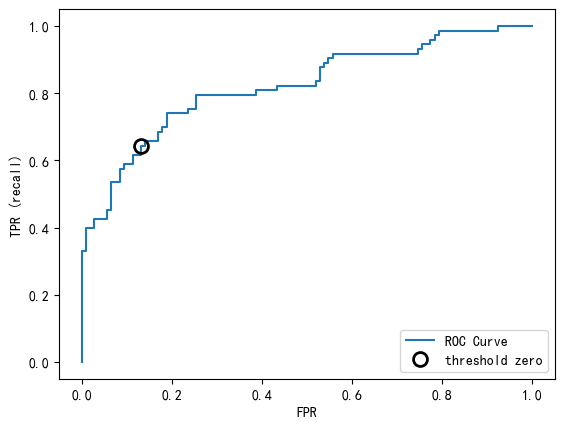

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## 【任务总结】    
做数据分析的目的，就是运用数据、结合业务来得到某些我们想要知道的结果。    
分析的第一步就是建模，搭建一个预测模型或者其他模型。    
从模型得到预测结果之后，还要要分析这个模型是不是足够可靠，这样就需要评估这个模型。